In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
# import pandas.tools.rplot as rplot
from sklearn.ensemble import RandomForestClassifier

In [2]:
crime_chicago = pd.read_csv(('Crime_Report_Chicago.csv'), parse_dates=['Date'], index_col='Date')
df = crime_chicago.head()
df

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2016-05-03 21:00:00,10508593,HZ250410,042XX W MADISON ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,SIDEWALK,True,False,1115,...,28,26,18,1148220.0,1899677.0,2016,5/10/2016 15:56,41.880658,-87.731212,"(41.880658176, -87.731212135)"
2016-05-03 21:35:00,10508594,HZ250385,065XX S KEDVALE AVE,810,THEFT,OVER $500,APARTMENT,False,True,833,...,13,65,6,1149830.0,1860872.0,2016,5/10/2016 15:56,41.774141,-87.726307,"(41.77414081, -87.726307093)"
2016-05-03 14:45:00,10508595,HZ250362,045XX S DAMEN AVE,560,ASSAULT,SIMPLE,STREET,False,True,924,...,12,61,08A,1163662.0,1874660.0,2016,5/10/2016 15:56,41.811698,-87.675214,"(41.811697721, -87.675214316)"
2016-05-03 18:42:00,10508597,HZ250202,063XX S CLAREMONT AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,825,...,15,66,08B,1161829.0,1862607.0,2016,5/10/2016 15:56,41.778661,-87.682273,"(41.778661058, -87.68227253)"
2016-05-03 15:00:00,10508598,HZ250298,070XX S INDIANA AVE,320,ROBBERY,STRONGARM - NO WEAPON,SIDEWALK,False,False,322,...,6,69,3,1178808.0,1858478.0,2016,5/10/2016 15:56,41.766961,-87.620152,"(41.766961034, -87.620152116)"


In [3]:
crime_chicago['DayOfWeek'] = crime_chicago.index.dayofweek
crime_chicago['Hour'] = crime_chicago.index.hour
crime_chicago['Month'] = crime_chicago.index.month
crime_chicago['Year'] = crime_chicago.index.year
crime_chicago['DayOfMonth'] = crime_chicago.index.day

In [4]:
crime_chicago['Month'].head()

Date
2016-05-03 21:00:00    5
2016-05-03 21:35:00    5
2016-05-03 14:45:00    5
2016-05-03 18:42:00    5
2016-05-03 15:00:00    5
Name: Month, dtype: int32

In [5]:
import pylab

In [6]:
pylab.rcParams['figure.figsize'] = (16.0, 8.0)

monthsIdx = crime_chicago.groupby('Month').size().keys() - 1
monthsLit = ['January', 'February', 
             'March', 'April', 'May', 
             'June', 'July','August', 
             'September', 'October', 'November', 'December']
occursByMonth = crime_chicago.groupby('Month').size().get_values()
occursByMonth

array([20341, 18583, 21877, 20951, 23312, 23767, 24560, 24485, 23183,
       23259, 20974, 15712], dtype=int64)

In [7]:
# Linear plot for all crimes
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax1.plot(monthsIdx, occursByMonth, 'ro-', linewidth=2)

ax1.set_title ('All Crimes', fontsize=20)

start, end = ax1.get_xlim()
ax1.xaxis.set_ticks(np.arange(start, end, 1))
ax1.set_xticklabels(monthsLit)

In [8]:
# ensure that ticks are only at the bottom and left parts of the plot
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()

In [9]:
Narcotics = crime_chicago[crime_chicago['Primary Type'] == "NARCOTICS"]
assault = crime_chicago[crime_chicago['Primary Type'] == "ASSAULT"]
theft = crime_chicago[crime_chicago['Primary Type'] == "THEFT"]
robbery = crime_chicago[crime_chicago['Primary Type'] == "ROBBERY"]
vandalism = crime_chicago[crime_chicago['Primary Type'] == "VANDALISM"]
homicide = crime_chicago[crime_chicago['Primary Type'] == "HOMICIDE"]

In [10]:
# Linear normalized plot for 6 top crimes
ax2 = plt.subplot2grid((3,3), (1,0), colspan=3, rowspan=2)

In [11]:
y = np.empty([6,12])

In [12]:
y[0] = Narcotics.groupby('Month').size().get_values()
y[1] = assault.groupby('Month').size().get_values()
y[2] = theft.groupby('Month').size().get_values()
y[3] = robbery.groupby('Month').size().get_values()
# y[4] = vandalism.groupby('Month').size().get_values()
# y[5] = homicide.groupby('Month').size().get_values()

In [13]:
y[3]

array([ 1039.,   703.,   786.,   771.,   961.,   906.,  1126.,  1239.,
        1028.,  1149.,  1157.,   889.])

In [14]:
crimes = ['NARCOTICS', 'ASSAULT', 'THEFT', 'ROBBERY']
# 'VANDALISM', 'HOMICIDE']
color_sequence = ['#2ca02c','#d62728', '#9467bd', '#8c564b']
# '#1f77b4', '#ff7f0e', 

In [15]:
h = [None]*4
for i in range(0,4):
    y[i]= (y[i]-min(y[i]))/(max(y[i])-min(y[i]))  # normalization
    h[i] = ax2.plot(monthsIdx, y[i],'o-', color=color_sequence[i], lw=2)

In [16]:
ax2.set_ylabel("Crime occurences by month, normalized")

ax2.xaxis.set_ticks(np.arange(start, end+2, 1))
ax2.set_xticklabels(monthsLit)

ax2.legend((item[0] for item in h), 
           crimes, 
           bbox_to_anchor=(0.87, 1), loc=2, borderaxespad=0., frameon=False)

In [17]:
pylab.gcf().text(0.5, 1.00, 
            'Occurance of crimes by Month in Chicago',
            horizontalalignment='center',
            verticalalignment='top', 
             fontsize = 10)


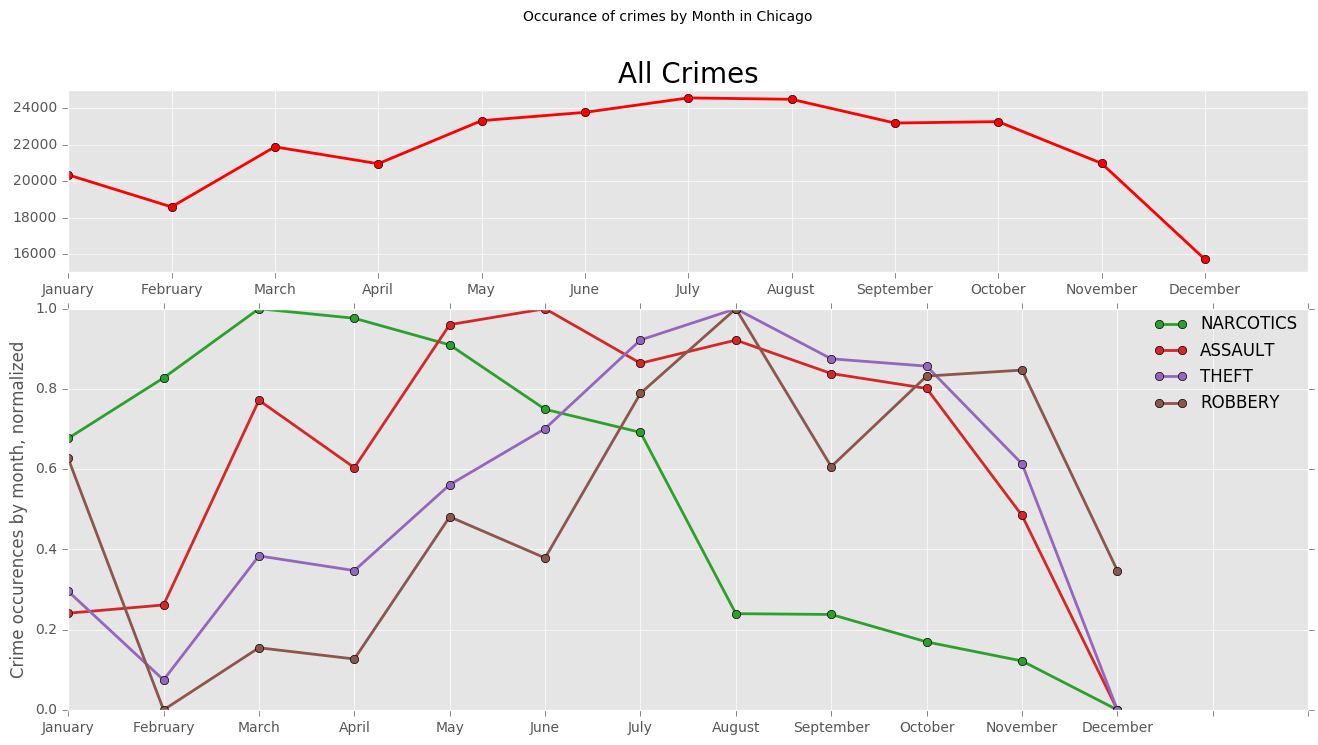

In [18]:
plt.show()